# 1

In [2]:
data = read.csv("reglab1.txt", sep = "\t", stringsAsFactors = TRUE)
head(data)

,z,x,y
,<dbl>,<dbl>,<dbl>
1,2.836772,0.2710104,0.3083308
2,4.987167,0.5895982,0.5149134
3,6.412325,0.6517442,0.7304530
4,4.641998,0.5819827,0.4614002
5,2.793941,0.4636884,0.1911021
6,2.934520,0.3835542,0.2612945


In [4]:
result_x <- lm(x ~ ., data = data)
summary(result_x)$r.squared
result_y <- lm(y ~ ., data = data)
summary(result_y)$r.squared
result_z <- lm(z ~ ., data = data)
summary(result_z)$r.squared

[1] 0.9186677

[1] 0.9505275

[1] 0.9686287

# 2

In [12]:
data <- read.table("reglab2.txt", header = TRUE, sep = "\t", stringsAsFactors = TRUE)
head(data)

for(i in 1:4)
{
    combination <- combn(data[, 2:5], i)
    
    for(j in 1:length(combination[1,]))
    {
        tmp = 0
        
        if(i == 1)
            tmp <- data.frame(data$y, combination[1, j])
        else if(i == 2) 
            tmp <- data.frame(data$y, combination[1, j], combination[2, j])
        else if(i == 3)
            tmp <- data.frame(data$y, combination[1, j], combination[2, j], combination[3, j])
        else if(i == 4)
            tmp <- data.frame(data$y, combination[1, j], combination[2, j], combination[3, j], combination[4, j])
            
        res <- lm(tmp$data.y ~., data = tmp)
        print(sum((tmp$data.y - res$fitted.values)^2))
    }
}


,y,x1,x2,x3,x4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.4697200,0.23362753,0.83554899,0.1029653,0.45742768
2,0.7684485,0.11791994,0.09054379,0.2587784,0.28395097
3,2.8803737,0.09152018,0.79759245,0.1985277,0.69928681
4,3.7454851,0.87672239,0.06293480,0.6154150,0.17605768
5,1.8539662,0.20740592,0.30348994,0.7759667,0.66735068
6,1.2952686,0.04407584,0.36008230,0.6572325,0.04344568


[1] 157.2198
[1] 268.2458
[1] 393.4905
[1] 394.5905
[1] 0.5379617
[1] 156.3541
[1] 157.2193
[1] 267.7955
[1] 267.8061
[1] 393.4587
[1] 0.3322662
[1] 0.3619682
[1] 156.3483
[1] 267.4415
[1] 0.1928635


# 3

In [43]:
data <- read.table("cygage.txt", header = TRUE, sep = "\t", stringsAsFactors = TRUE)
head(data)

result_with_weights <- lm(calAge~Depth, data=data, weights = data$Weight)
summary(result_with_weights)

,calAge,Depth,Weight
,<int>,<int>,<dbl>
1,0,0,1.0
2,3707,77,0.1
3,4150,90,0.1
4,5350,107,0.1
5,4500,168,0.1
6,7260,217,0.1



Call:
lm(formula = calAge ~ Depth, data = data, weights = data$Weight)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-784.6 -137.7  200.8  466.6  702.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  784.570    422.882   1.855   0.0932 .  
Depth         21.909      1.139  19.235 3.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 522.1 on 10 degrees of freedom
Multiple R-squared:  0.9737,	Adjusted R-squared:  0.9711 
F-statistic:   370 on 1 and 10 DF,  p-value: 3.141e-09


# 4

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639



Call:
lm(formula = Employed ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41011 -0.15767 -0.02816  0.10155  0.45539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.482e+03  8.904e+02  -3.911 0.003560 ** 
GNP.deflator  1.506e-02  8.492e-02   0.177 0.863141    
GNP          -3.582e-02  3.349e-02  -1.070 0.312681    
Unemployed   -2.020e-02  4.884e-03  -4.136 0.002535 ** 
Armed.Forces -1.033e-02  2.143e-03  -4.822 0.000944 ***
Population   -5.110e-02  2.261e-01  -0.226 0.826212    
Year          1.829e+00  4.555e-01   4.016 0.003037 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3049 on 9 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9925 
F-statistic: 330.3 on 6 and 9 DF,  p-value: 4.984e-10


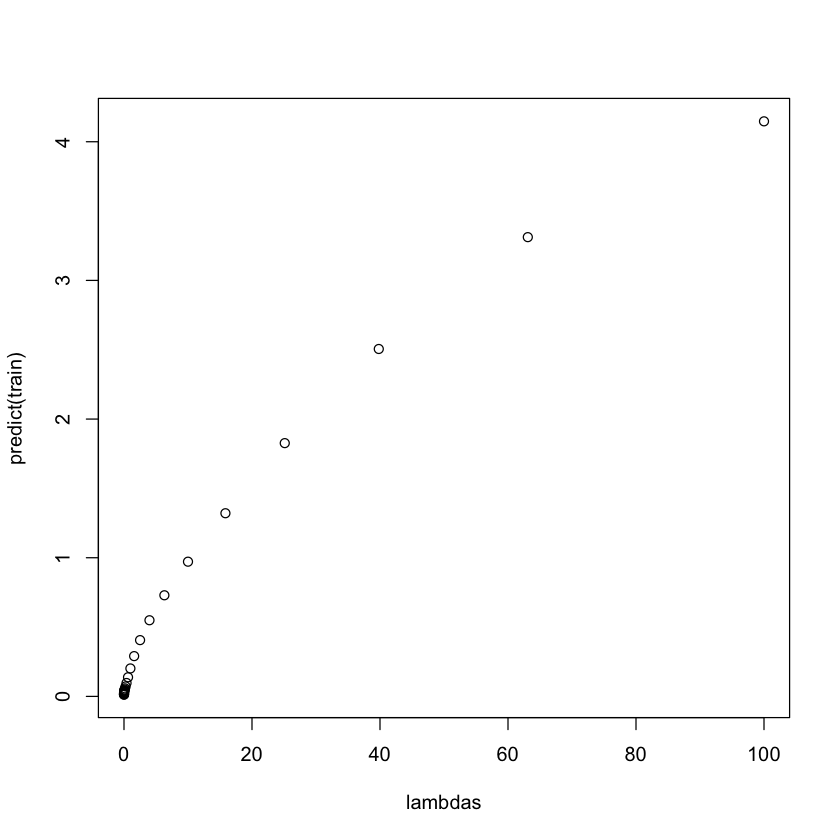

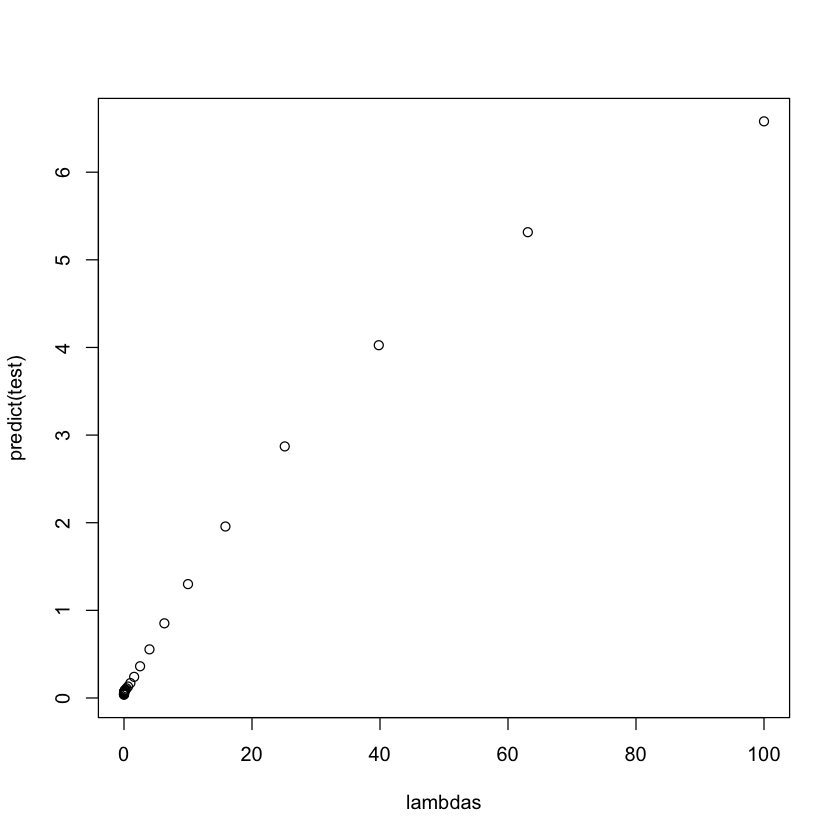

In [13]:
library(MASS)
library(Metrics)
library(datasets)
data <- longley
head(data)

result <- lm(Employed ~., data = data)
summary(result)

data = data[, -5]
#separate data for train and test
get_train_test <- function(data, persentage) {
    size = dim(data)[1]
    set.seed(12345)
    randomized = data[order(runif(size)), ]
    train_sep = as.integer(size * persentage / 100)
    test_sep = as.integer(size * persentage / 100)
    list(randomized[1 : train_sep, ], randomized[(test_sep + 1) : size, ])
}

#test the function
separated_data = get_train_test(data, 50)
train = separated_data[[1]]
test = separated_data[[2]]
lambdas = sapply(0:25, function(i) {10^(-3 + 0.2 * i)})

predict = function(dataset) {
    errors = sapply(lambdas, function(lambda) {
    model = lm.ridge(Employed ~., data = dataset, lambda=lambda)
    predicted = as.matrix(cbind(const=1,dataset[-6])) %*% coef(model)
    mse(predicted, dataset$Employed)
    })
    errors
}

plot(lambdas, predict(train))
plot(lambdas, predict(test))

# 5

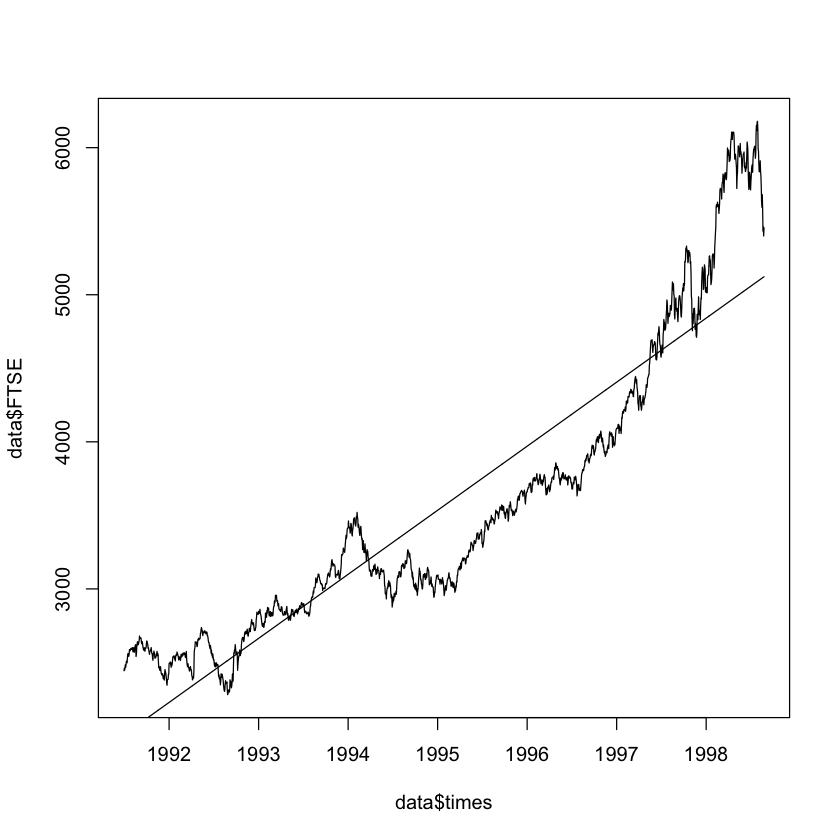

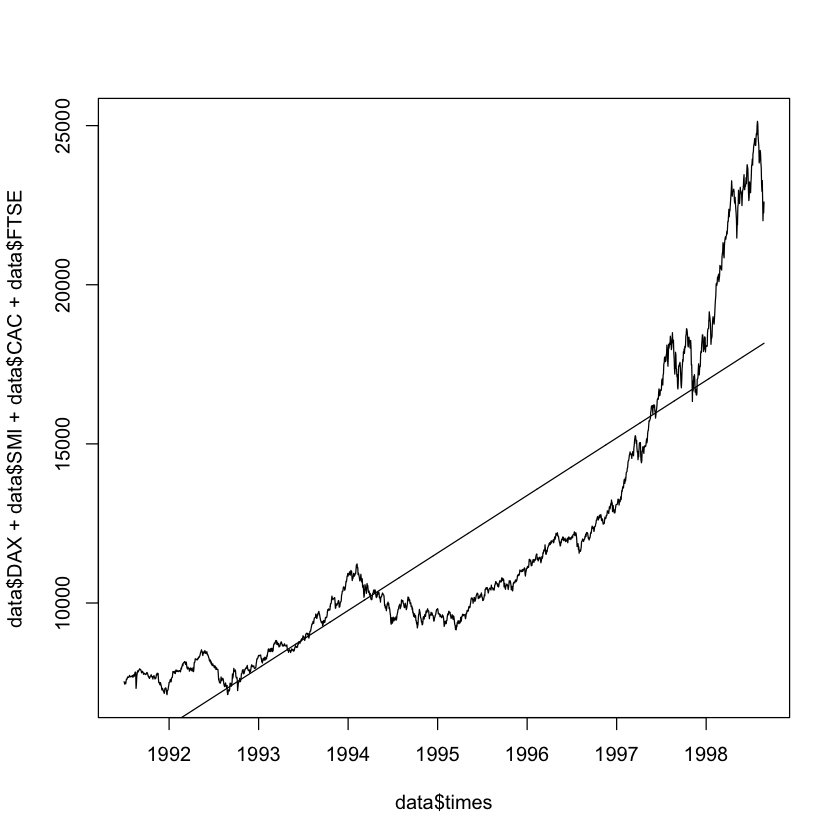

In [19]:
library(datasets)
data(EuStockMarkets)
data <- data.frame(DAX = as.vector(EuStockMarkets[, 1]),
                       SMI = as.vector(EuStockMarkets[, 2]),
                       CAC = as.vector(EuStockMarkets[, 3]),
                       FTSE = as.vector(EuStockMarkets[, 4]),
                       times =  as.numeric(time(EuStockMarkets)))
f1 <- lm(DAX ~ times, data = data)
plot(data$times, data$DAX, 'l')
lines(data$times, data$times * f1$coefficients[2] + f1$coefficients[1], 'l')

f2 <- lm(SMI ~ times, data = data)
plot(data$times, data$SMI, 'l')
lines(data$times, data$times * f2$coefficients[2] + f2$coefficients[1], 'l')

f3 <- lm(CAC ~ times, data = data)
plot(data$times, data$CAC, 'l')
lines(data$times, data$times * f3$coefficients[2] + f3$coefficients[1], 'l')

f4 <- lm(FTSE ~ times, data = data)
plot(data$times, data$FTSE, 'l')
lines(data$times, data$times * f4$coefficients[2] + f4$coefficients[1], 'l')

f5 <- lm(DAX + SMI + CAC + FTSE ~ times, data = data)
plot(data$times, data$DAX + data$SMI + data$CAC + data$FTSE , 'l')
lines(data$times, data$times * f5$coefficients[2] + f5$coefficients[1], 'l')

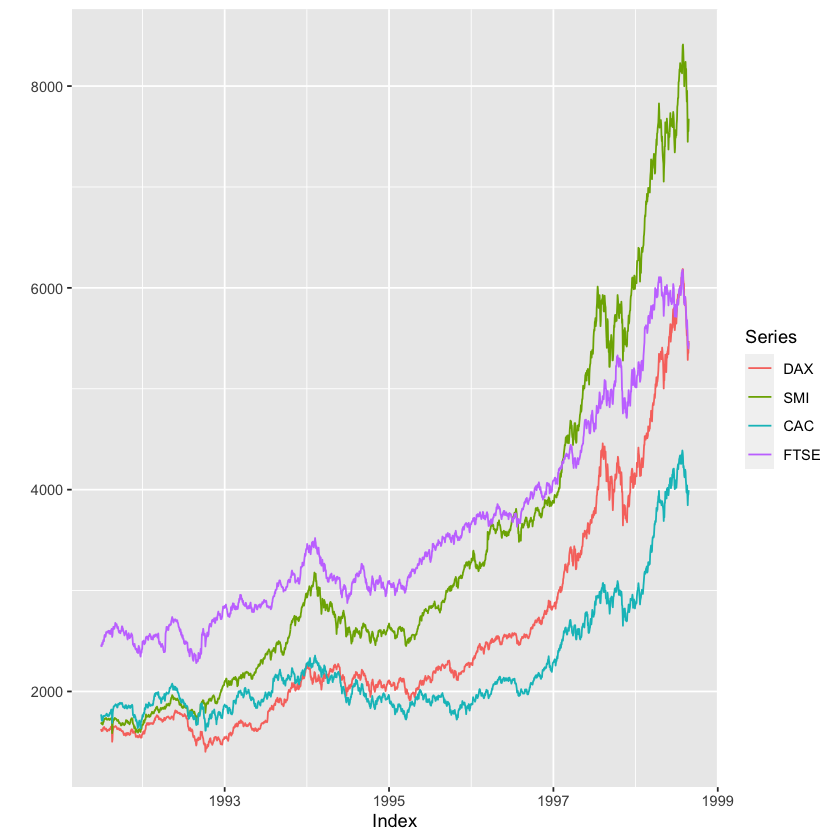

In [91]:
library(zoo)
zooMarkets <- as.zoo(EuStockMarkets)
autoplot(zooMarkets, facet = NULL) # plot without facets

# 6

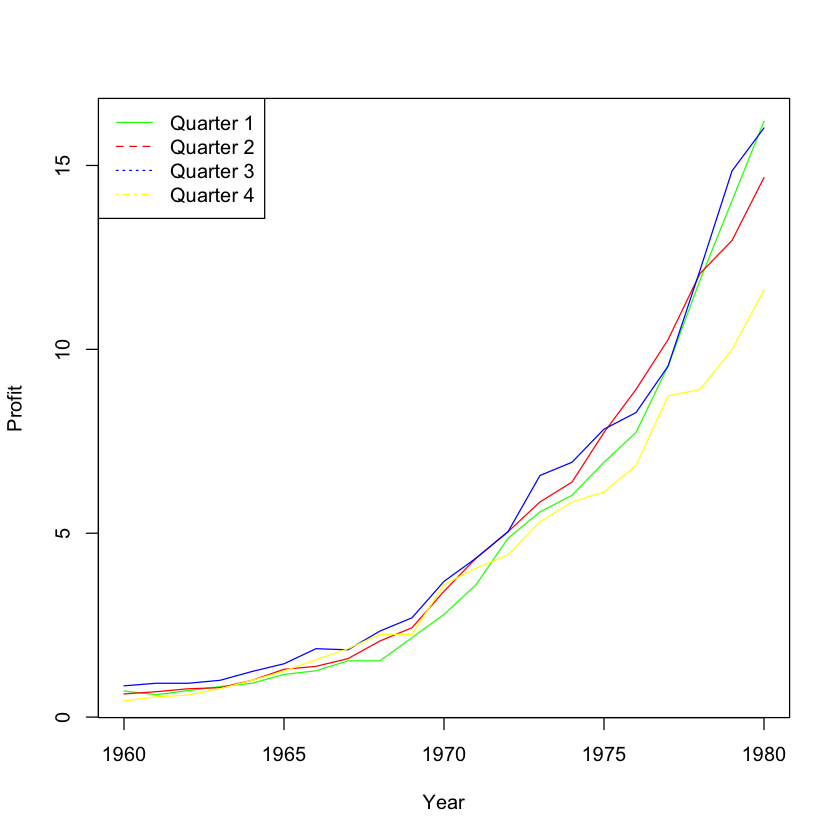

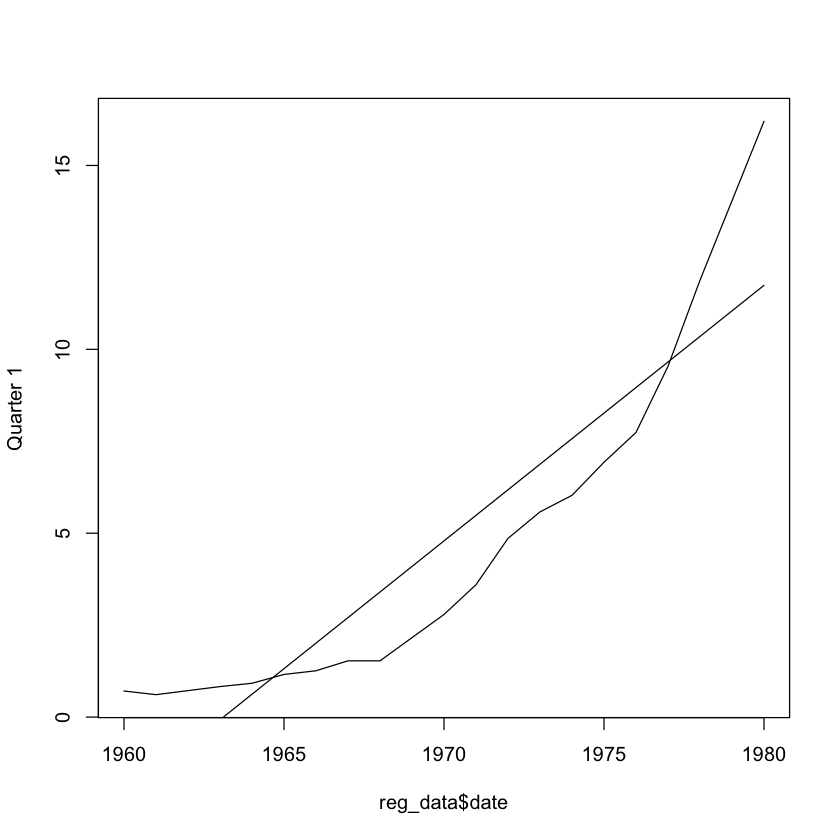

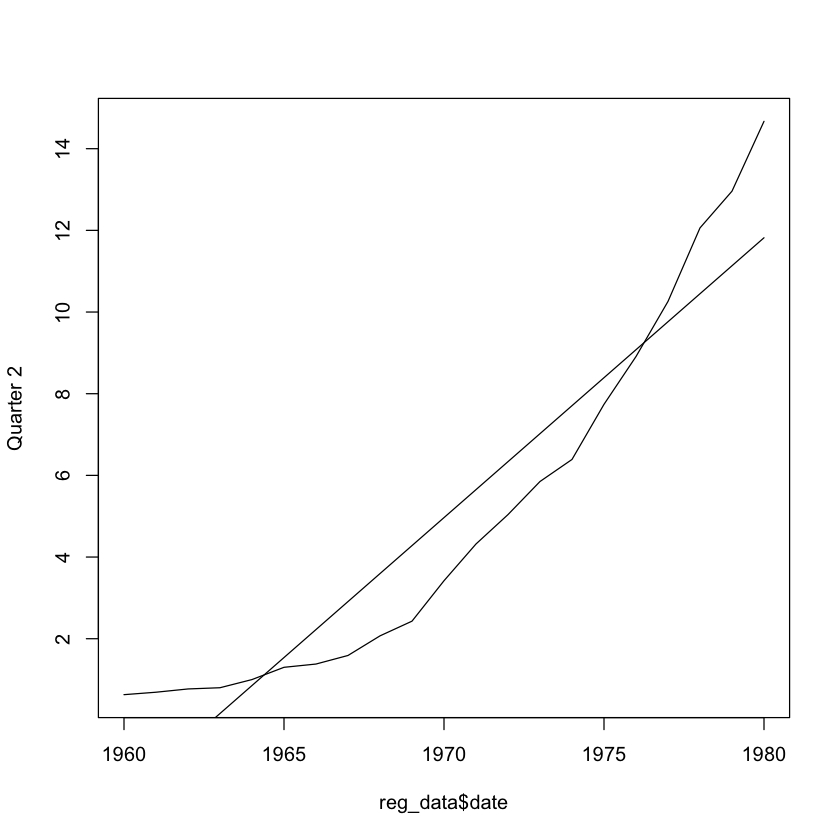

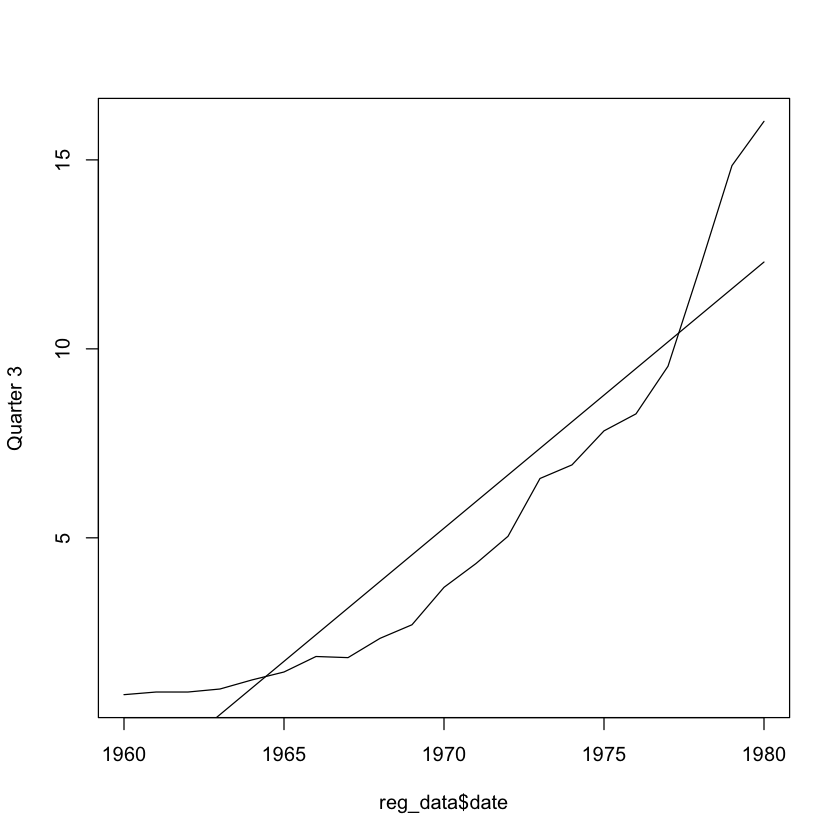

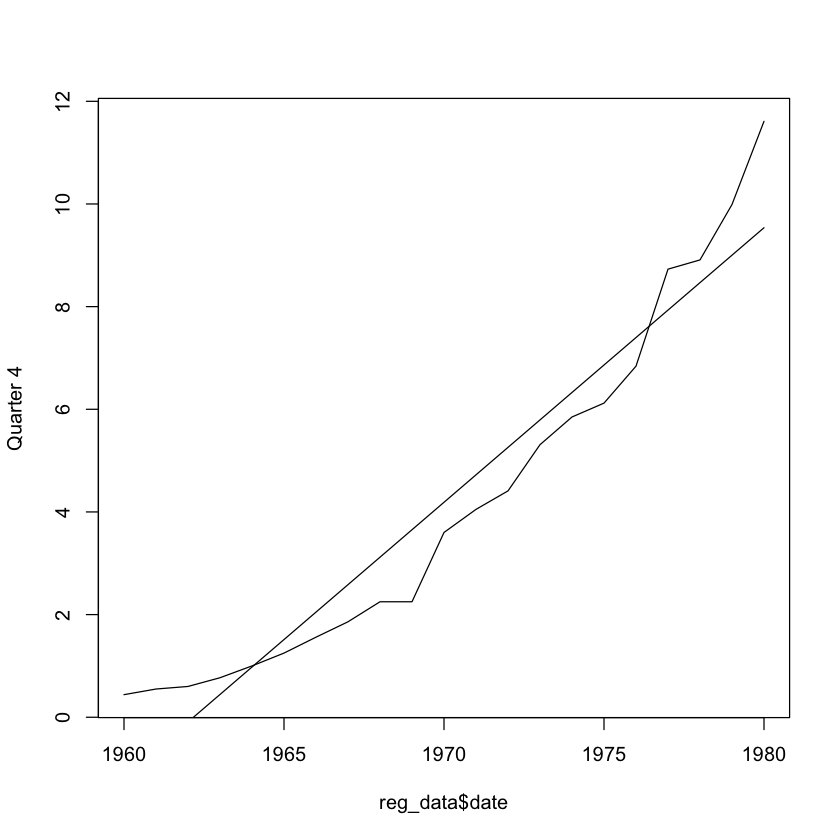

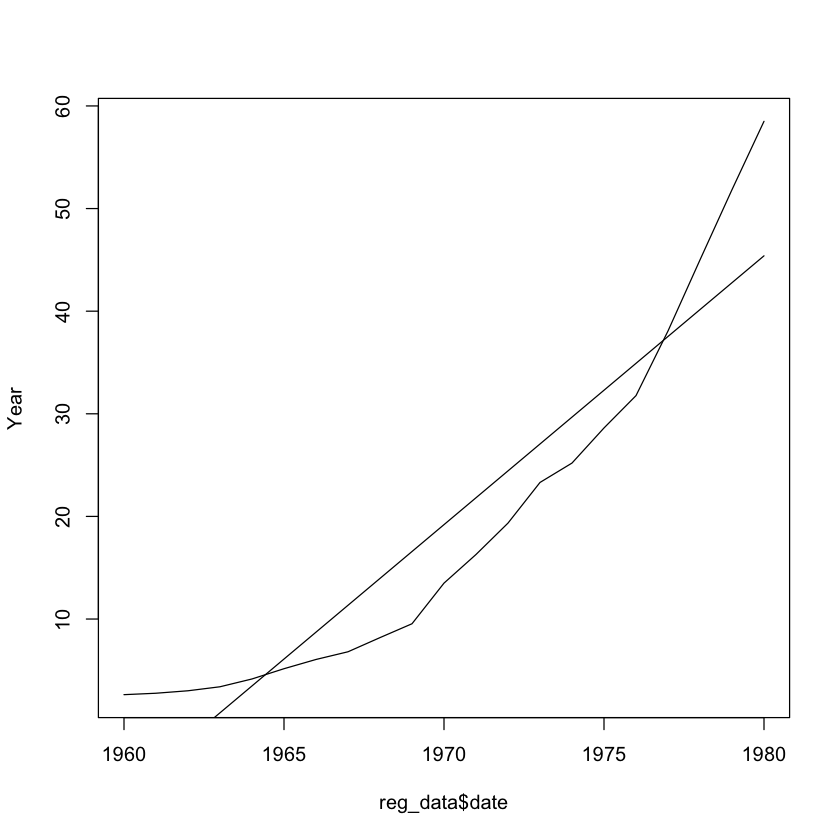

In [28]:
library(datasets)
tmp <- JohnsonJohnson

quarter1 <- numeric(length(tmp) / 4)
quarter2 <- numeric(length(tmp) / 4)
quarter3 <- numeric(length(tmp) / 4)
quarter4 <- numeric(length(tmp) / 4)

for (i in 0:(length(tmp) / 4 - 1)) {
  quarter1[i + 1] <- as.numeric(tmp[4 * i + 1])
  quarter2[i + 1] <- as.numeric(tmp[4 * i + 2])
  quarter3[i + 1] <- as.numeric(tmp[4 * i + 3])
  quarter4[i + 1] <- as.numeric(tmp[4 * i + 4])
}

reg_data <- data.frame(Quarter1 = quarter1, 
                       Quarter2 = quarter2,
                       Quarter3 = quarter3,
                       Quarter4 = quarter4,
                       date = 1960:1980)

plot(reg_data$date, reg_data$Quarter1, col = "green", ylab = "Profit", xlab = 'Year', 'l')
lines(reg_data$date, reg_data$Quarter2, col = "red")
lines(reg_data$date, reg_data$Quarter3, col = "blue")
lines(reg_data$date, reg_data$Quarter4, col = "yellow")
legend("topleft", 
       legend=c("Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4"),
       col=c("green", "red", "blue", "yellow"),
       lty=1:4)

f1 <- lm(Quarter1 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter1, 'l', ylab = 'Quarter 1')
lines(reg_data$date, reg_data$date * f1$coefficients[2] + f1$coefficients[1], 'l')

f2 <- lm(Quarter2 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter2, 'l', ylab = 'Quarter 2')
lines(reg_data$date, reg_data$date * f2$coefficients[2] + f2$coefficients[1], 'l')

f3 <- lm(Quarter3 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter3, 'l', ylab = 'Quarter 3')
lines(reg_data$date, reg_data$date * f3$coefficients[2] + f3$coefficients[1], 'l')

f4 <- lm(Quarter4 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter4, 'l', ylab = 'Quarter 4')
lines(reg_data$date, reg_data$date * f4$coefficients[2] + f4$coefficients[1], 'l')

f5 <- lm(Quarter1 + Quarter2 + Quarter3 + Quarter4 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter1 + reg_data$Quarter2 + reg_data$Quarter3 + reg_data$Quarter4, 
     'l', ylab = 'Year')
lines(reg_data$date, reg_data$date * f5$coefficients[2] + f5$coefficients[1], 'l')

# 7

[1] 0.04225154


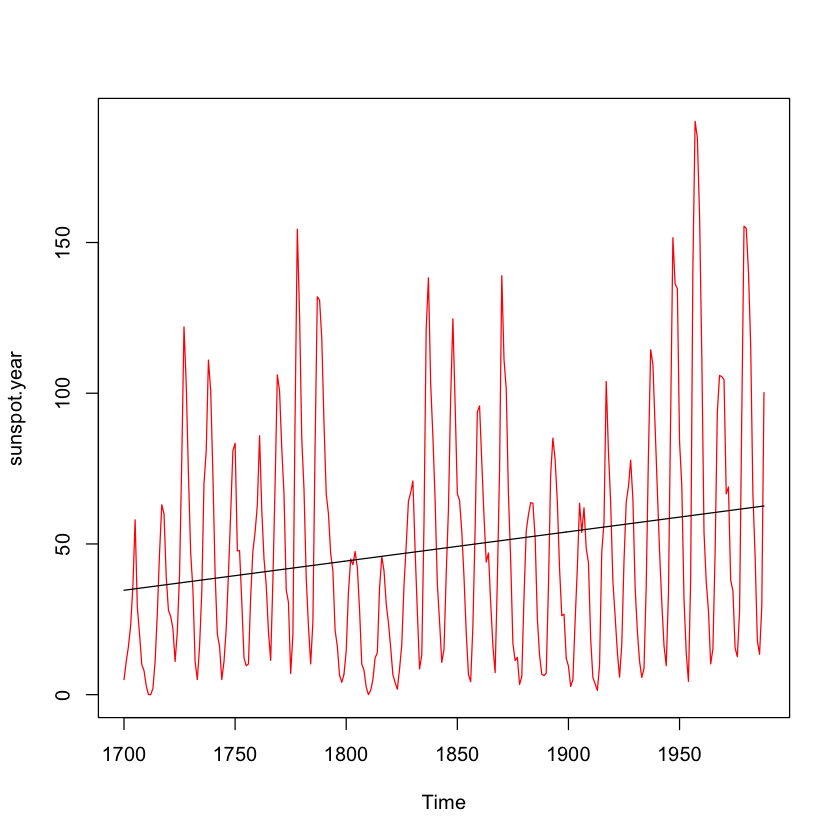

In [29]:
library(datasets)

reg_data <- data.frame(spot = as.numeric(sunspot.year), date = 1700:1988)
f <- lm(spot ~ date, data = reg_data)
print(summary(f)$r.squared)

plot(sunspot.year, col = 'red')
lines(reg_data$date, reg_data$date * f$coefficients[2] + f$coefficients[1], 'l')

# 8

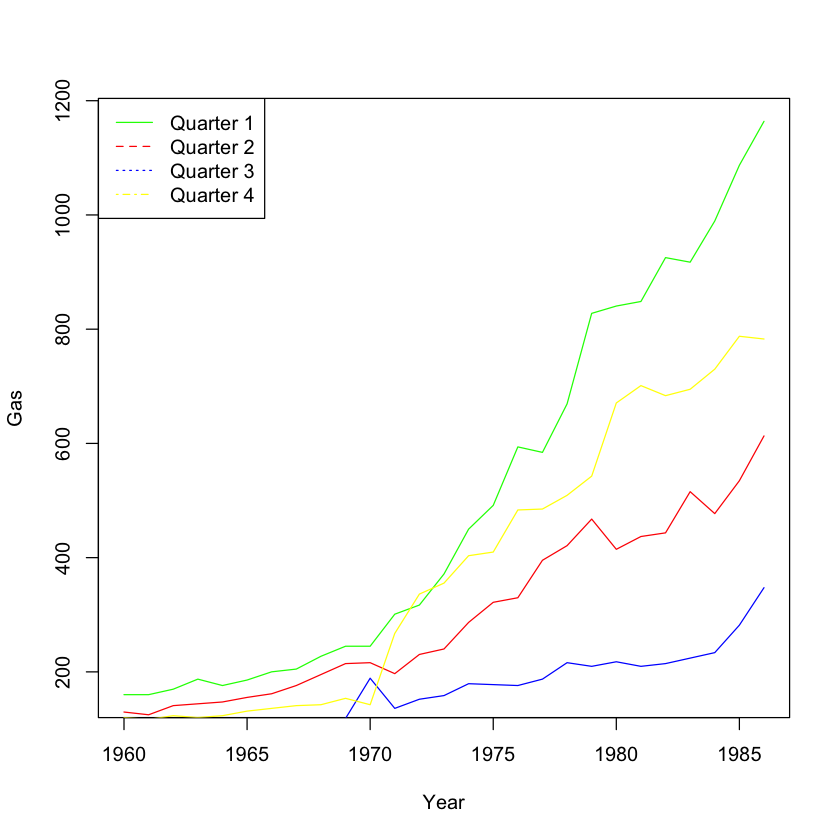

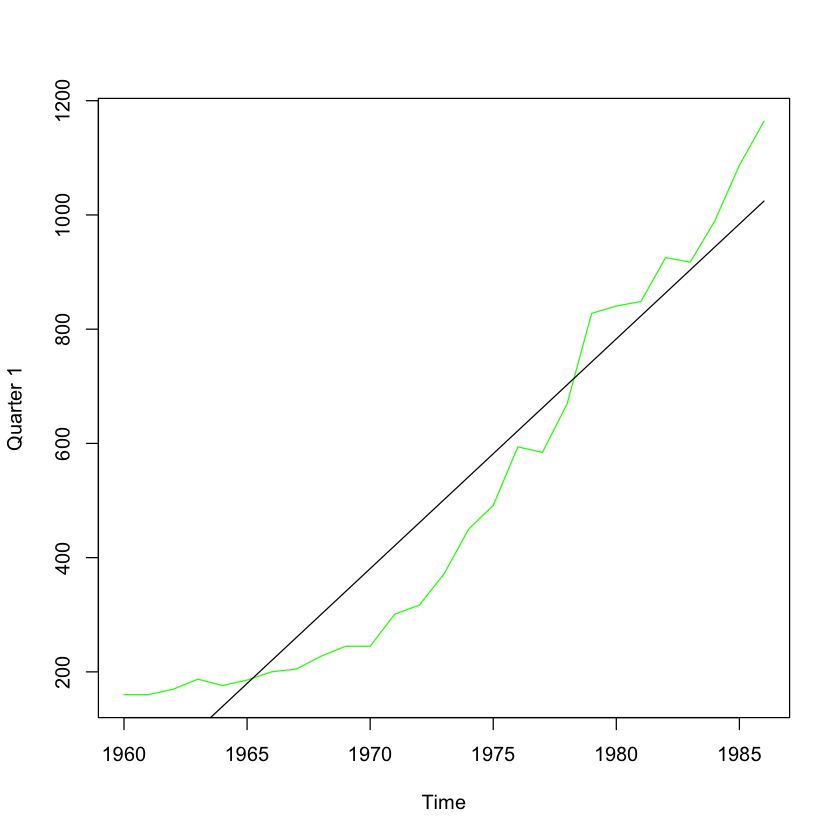

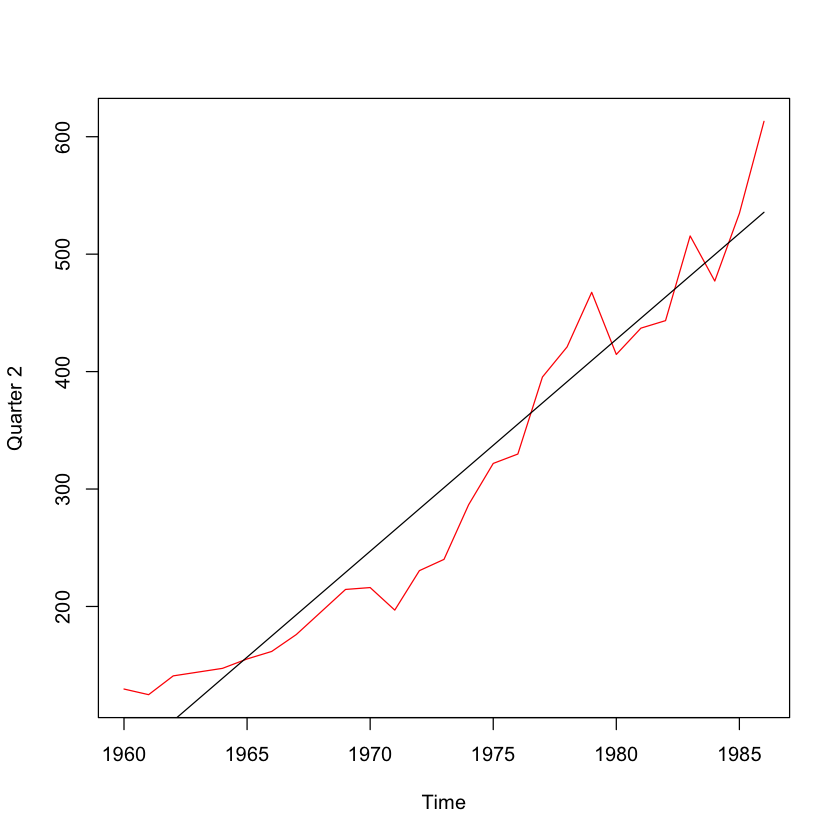

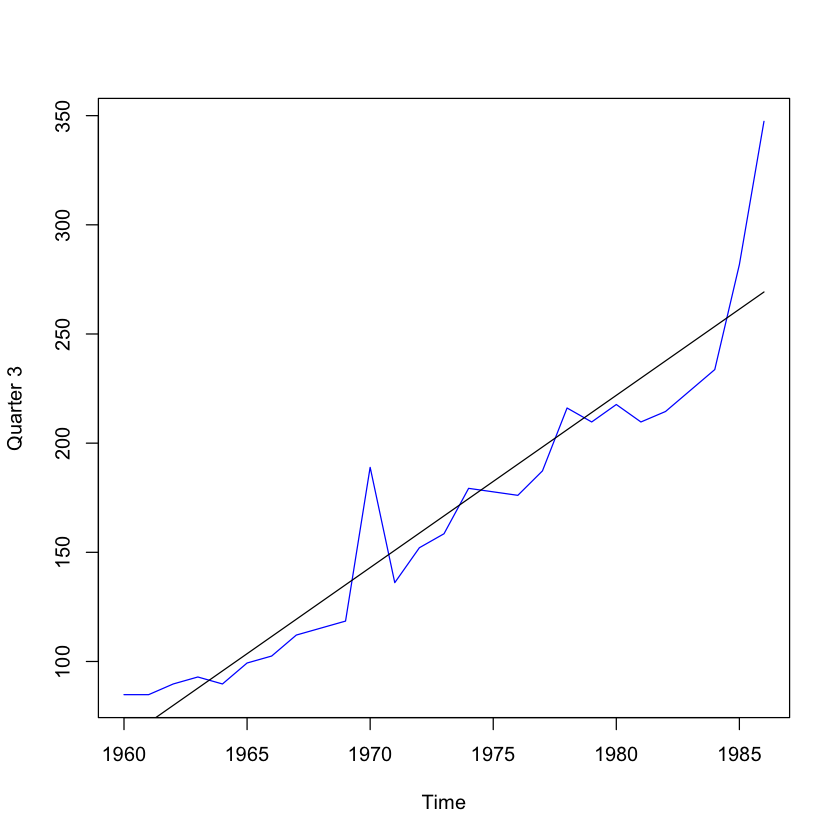

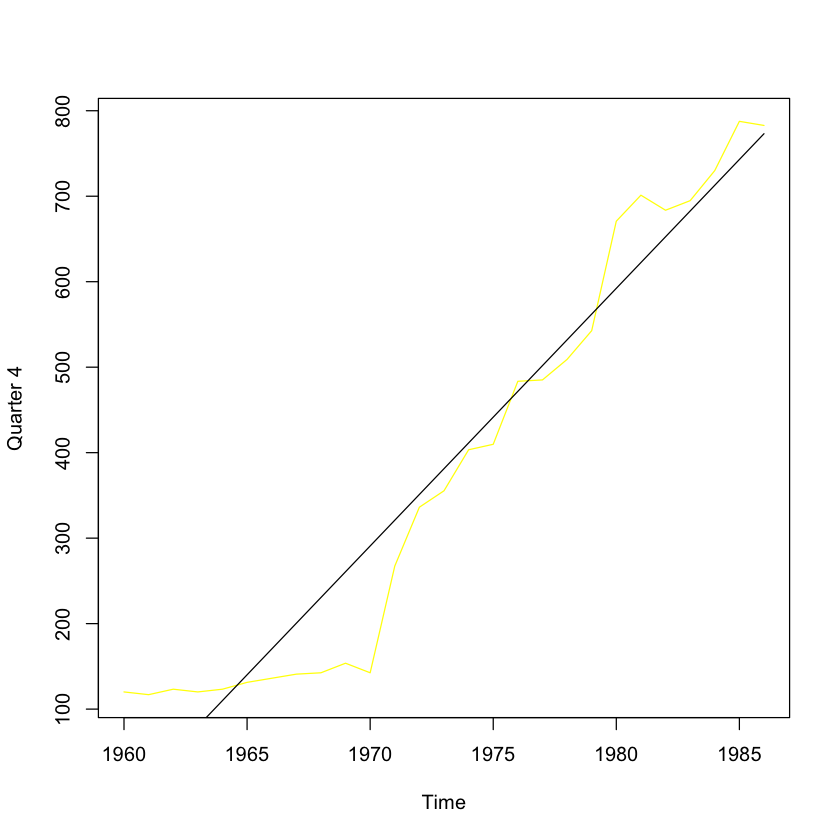

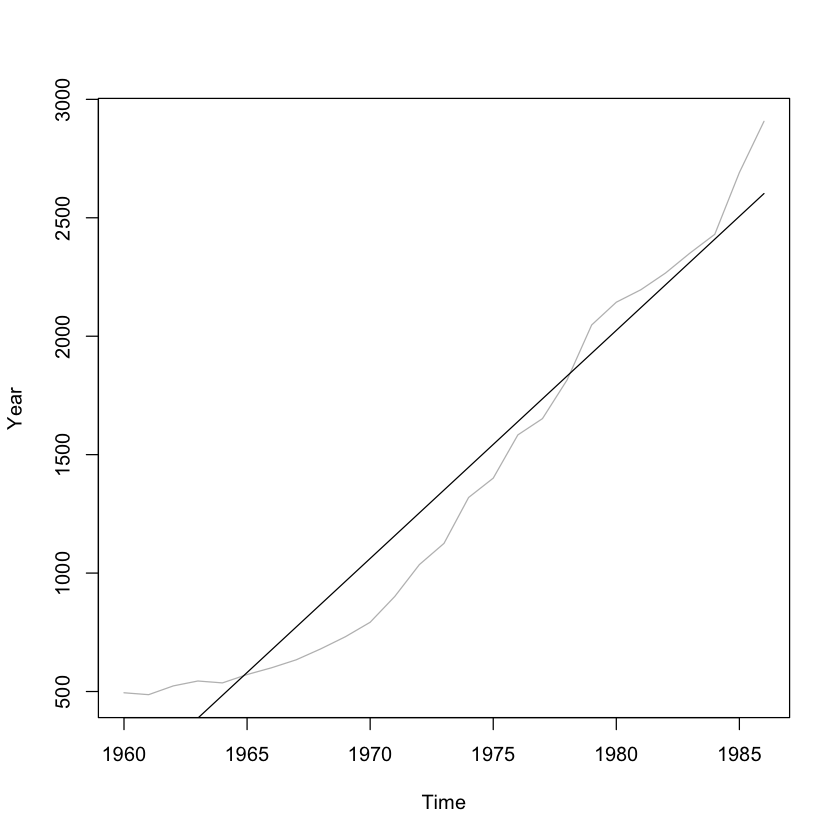

In [31]:
tmp <- read.csv('UKgas.csv')

quarter1 <- numeric(nrow(tmp) / 4)
quarter2 <- numeric(nrow(tmp) / 4)
quarter3 <- numeric(nrow(tmp) / 4)
quarter4 <- numeric(nrow(tmp) / 4)

for (i in 0:(nrow(tmp) / 4 - 1)) {
  quarter1[i + 1] <- tmp$UKgas[4 * i + 1]
  quarter2[i + 1] <- tmp$UKgas[4 * i + 2]
  quarter3[i + 1] <- tmp$UKgas[4 * i + 3]
  quarter4[i + 1] <- tmp$UKgas[4 * i + 4]
}

reg_data <- data.frame(Quarter1 = quarter1, 
                       Quarter2 = quarter2,
                       Quarter3 = quarter3,
                       Quarter4 = quarter4,
                       date = 1960:1986)

plot(reg_data$date, reg_data$Quarter1, col = "green", ylab = "Gas", xlab = 'Year', 'l')
lines(reg_data$date, reg_data$Quarter2, col = "red")
lines(reg_data$date, reg_data$Quarter3, col = "blue")
lines(reg_data$date, reg_data$Quarter4, col = "yellow")
legend("topleft", 
       legend=c("Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4"),
       col=c("green", "red", "blue", "yellow"),
       lty=1:4)

f1 <- lm(Quarter1 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter1, 'l', col = 'green', xlab = 'Time', ylab = 'Quarter 1')
lines(reg_data$date, reg_data$date * f1$coefficients[2] + f1$coefficients[1], 'l')

f2 <- lm(Quarter2 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter2, 'l', col = 'red', xlab = 'Time', ylab = 'Quarter 2')
lines(reg_data$date, reg_data$date * f2$coefficients[2] + f2$coefficients[1], 'l')

f3 <- lm(Quarter3 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter3, 'l', col = 'blue', xlab = 'Time', ylab = 'Quarter 3')
lines(reg_data$date, reg_data$date * f3$coefficients[2] + f3$coefficients[1], 'l')

f4 <- lm(Quarter4 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter4, 'l', col = 'yellow', xlab = 'Time', ylab = 'Quarter 4')
lines(reg_data$date, reg_data$date * f4$coefficients[2] + f4$coefficients[1], 'l')

f5 <- lm(Quarter1 + Quarter2 + Quarter3 + Quarter4 ~ date, data = reg_data)
plot(reg_data$date, reg_data$Quarter1 + reg_data$Quarter2 + reg_data$Quarter3 + reg_data$Quarter4, 
     'l', col = 'grey', xlab = 'Time', ylab = 'Year')
lines(reg_data$date, reg_data$date * f5$coefficients[2] + f5$coefficients[1], 'l')

# 9

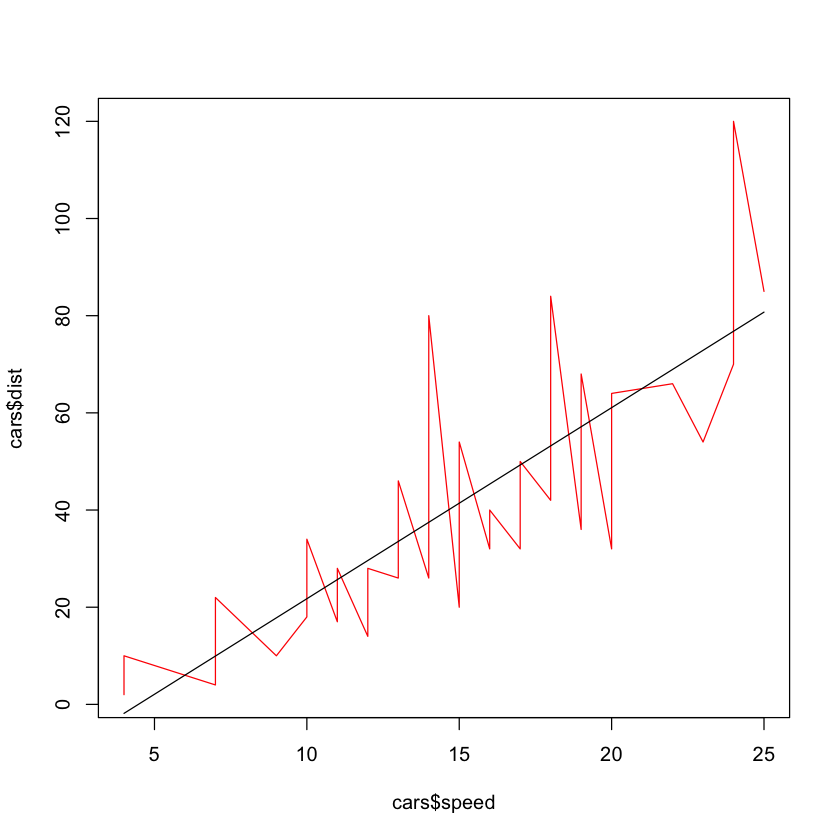

In [34]:
library(datasets)

f <- lm(dist ~ speed, cars)

plot(cars$speed, cars$dist, 'l', col = 'red')
lines(cars$speed, cars$speed * f$coefficients[2] + f$coefficients[1], 'l')